# The Black-Scholes equation for European options.

$$ V_{t}+1/2σ^{2}S^{2}V_{ss}+rsV_{S}-rV = 0, \quad S \in (0, S_{max}), \quad t \in (0, 1) $$

$V$ - is the option price

$S$ - is the underlying asset price

$\sigma$ - is the volatility of the asset

$r$ - is the risk-free interest rate

$t$ - is time
#### Boundary condition
$$ V(0, t) = 0, \quad t>0 $$

$$ V(S_{max},t) = S_{max}- Ke^{r(1 −t)} \quad t>0$$
#### Initial condition

$$ V(S,1) = \max(S-K,0) \quad S \in [0,S_{max}] $$



In [2]:
import numpy as np
import scipy as sc
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from typing import Optional
import scipy.sparse

In [3]:
class Setup_Black_Scholes:
    def __init__(self,S_max,strike_price,dS,dt,sigma,r):
        self.S_range = (0,S_max)
        self.t_range = (0,1)

        self.S_max = S_max

        self.K = strike_price
        self.sigma = sigma
        self.r = r

        self.dS = dS
        self.dt = dt
        
        self.S_num = round((self.S_range[1] - self.S_range[0]) / dS) + 1
        self.t_num = round((self.t_range[1] - self.t_range[0]) / dt) + 1

        self.S, self.dS = np.linspace(*self.S_range, self.S_num, retstep=True)
        self.T, self.dt = np.linspace(*self.t_range, self.t_num, retstep=True)

    def boundary_bottom(self,t):
        return 0

    def boundary_top(self,t):
        return self.S_max - self.K * np.exp(-self.r * (1 - t))

    def initial(self,S):
        return np.maximum(S - self.K,0)


In [4]:
setup_1 = Setup_Black_Scholes(30,15,1,0.001,0.15,0.02)

setup_2 = Setup_Black_Scholes(50,15,0.5,0.001,0.15,0.02)

setup_3 = Setup_Black_Scholes(30,15,1,0.001,0.15,0.1)

setup_4 = Setup_Black_Scholes(30,15,1,0.001,0.7,0.02)

In [5]:
def bs_solve(setup):
    # v(s,t) 
    v = np.zeros((setup.S_num,setup.t_num)) # N+1, M+1
    v[:,0] = setup.initial(setup.S)
    v[0,:] = setup.boundary_bottom(setup.T)
    v[-1,:] = setup.boundary_top(setup.T)
    var = setup.sigma * setup.sigma

    for t in range(0,setup.t_num-1): # explicit scheme
        for s in range(1,setup.S_num-1):
            a = 0.5 * setup.dt * (var * s ** 2 - setup.r * s)
            b = 1 - setup.dt * (var * s ** 2 + setup.r)
            c = 0.5 * setup.dt * (var * s ** 2 + setup.r * s)
            v[s,t + 1] = a * v[s - 1,t] + b * v[s,t] + c * v[s + 1,t]
            
    return v

In [6]:
def plot_surface(values, setup):
    # figure(figsize=(8, 6), dpi=80)
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    
    S = setup.S
    T = setup.T
    T, S = np.meshgrid(T, S)

    surf = ax.plot_surface(T, S, values, cmap=cm.coolwarm,
                           linewidth=1, antialiased=False)

    fig.colorbar(surf, shrink=0.5, aspect=15)
    plt.show()


In [7]:
def option_price_growth_in_time(values,s):
    X = values[s]

    X = X[::-1]
    T = setup_1.T

    plt.plot(T, X)

    plt.xlabel('Time')

    plt.ylabel('Option price')
    
    # giving a title to my graph
    plt.title('Increase in the option price with constant stock price')
    
    # function to show the plot
    plt.show()

In [8]:
option_values = bs_solve(setup_1)
option_values_2 = bs_solve(setup_2)
option_values_high_free_rate = bs_solve(setup_3)
option_values_high_var = bs_solve(setup_4)

# reverse because of backward difference estimate
option_values = option_values[:,::-1]
option_values_2 = option_values_2[:,::-1]
option_values_high_free_rate = option_values_high_free_rate[:,::-1]
option_values_high_var = option_values_high_var[:,::-1]

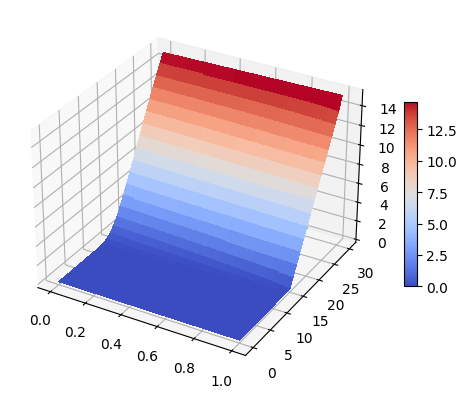

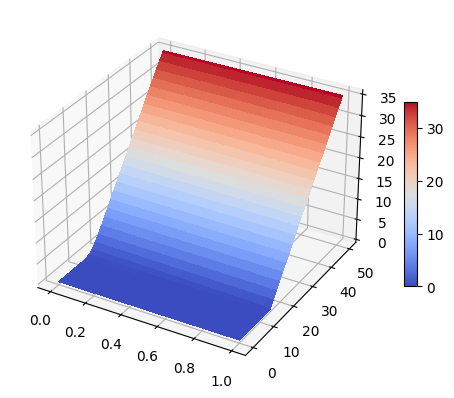

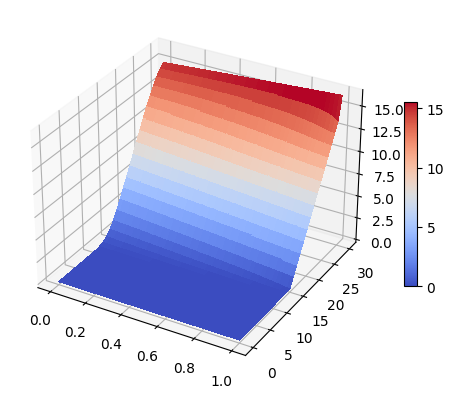

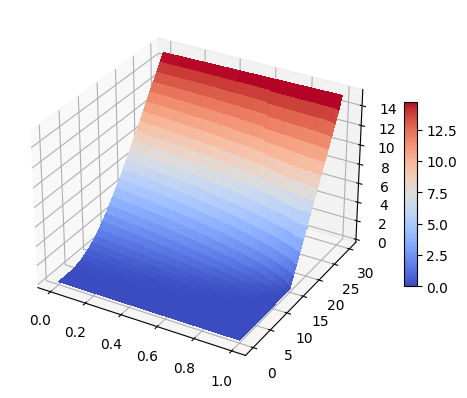

In [9]:
plot_surface(option_values,setup_1)
plot_surface(option_values_2,setup_2)
plot_surface(option_values_high_free_rate,setup_3)
plot_surface(option_values_high_var,setup_4)

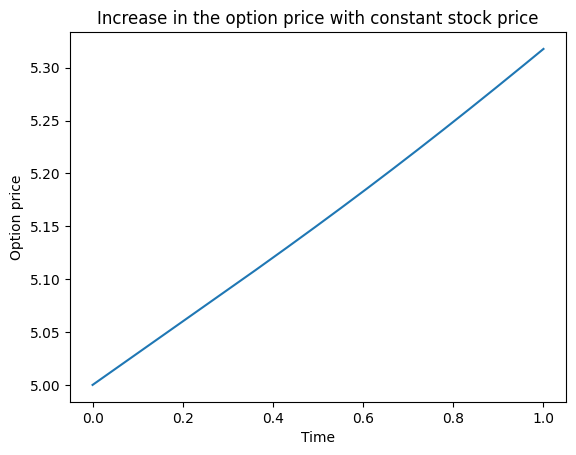

In [10]:
option_price_growth_in_time(option_values,20)

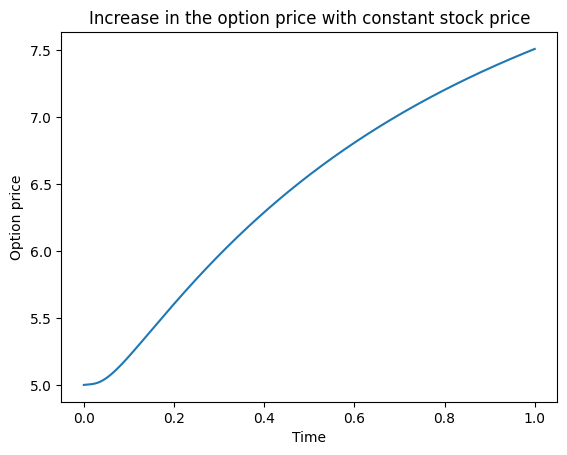

In [11]:
# For small variation
option_price_growth_in_time(option_values_high_var,20)

In [12]:
def option_price_for_stock_in_const_time(values,setup):
    print((int)(setup.t_num/2 - 1))
    Y_1 = values[:,(int)(setup.t_num - 1)]
    Y_2 = values[:,(int)(setup.t_num/2 - 1)]
    Y_3 = values[:,(int)(setup.t_num/10 - 1)]

    X = setup.S

    plt.plot(X, Y_1, label="t=1")
    plt.plot(X, Y_2, label="t=0.5")
    plt.plot(X, Y_3, label="t=0.10")
    
    plt.xlabel('Action price')
    plt.ylabel('Option price')
    
    plt.legend()

    plt.show()

499


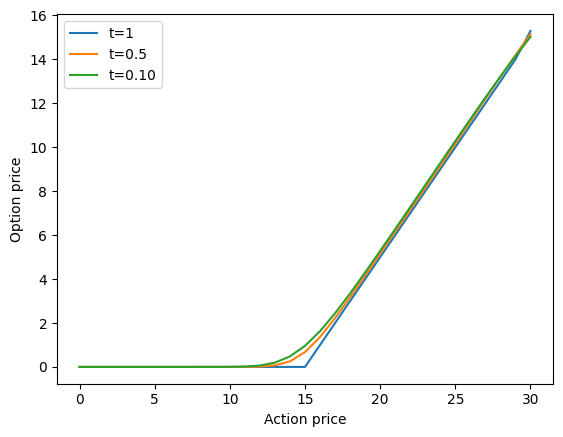

In [13]:
option_price_for_stock_in_const_time(option_values,setup_1)

In [26]:
def plot_surface_2(values,setup,rotate):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    S = setup.S
    T = setup.T
    T, S = np.meshgrid(T, S)

    ax.plot_surface(T, S, values)

    if rotate == 1:
        ax.view_init(30,180)
        
    ax.set_xlabel('Time')
    ax.set_ylabel('Stock price')
    ax.set_zlabel('Option price')
    ax.xaxis.set_label_coords(12, -.1)

    plt.show()

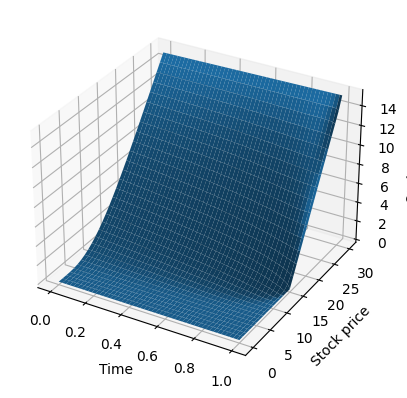

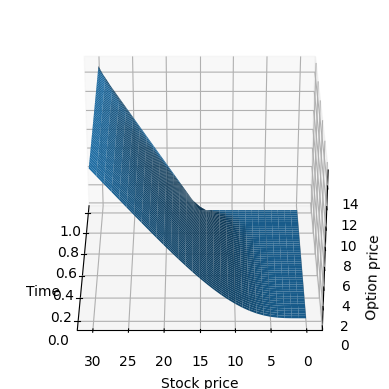

In [27]:
# plot for high variation
plot_surface_2(option_values_high_var,setup_1,0)
plot_surface_2(option_values_high_var,setup_1,1)